<a href="https://colab.research.google.com/github/adilimam12/Regression-capstone-project2/blob/main/TED_Talk_Views_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A TED talk is a recorded public-speaking presentation that was originally given at the main TED (technology, entertainment and design) .**

---


TED Conferences, LLC is an American-Canadian non-profit media organization that posts international talks online for free distribution under the slogan "ideas worth spreading"

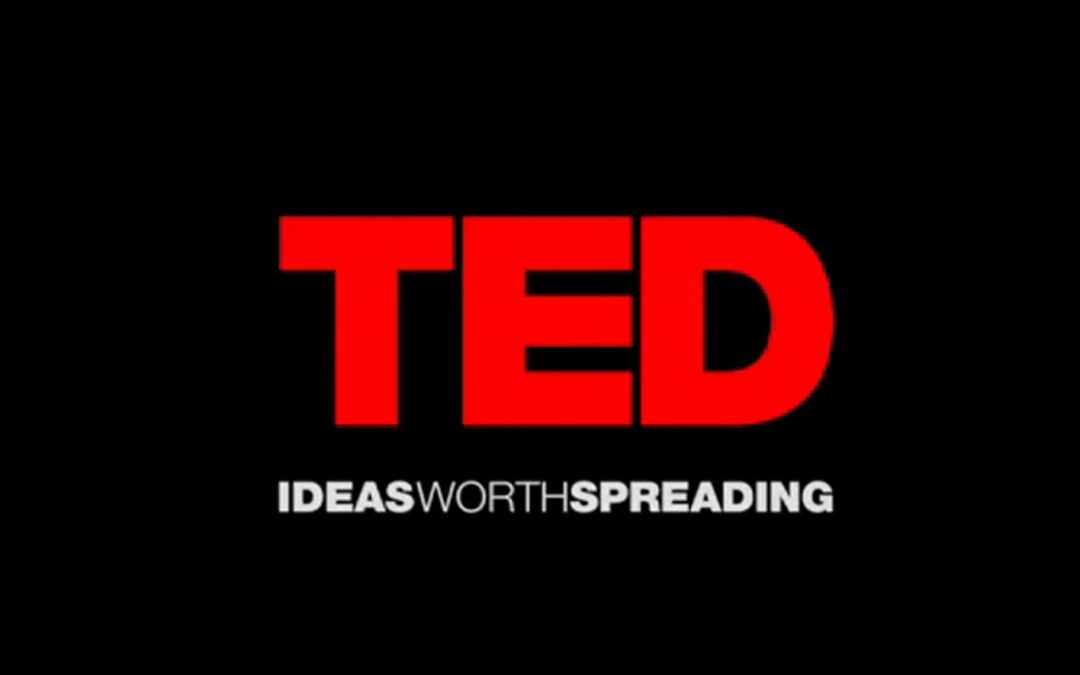

**Problem Statement**

---


TED is devoted to spreading powerful ideas on just about any topic. This dataset contain over 4,005 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

TED talks have been given for many years with the platform of "Ideas Worth Spreading". In the digital world we live in today, TED is a great platform to get your idea out there. But how do you know if your idea will be heard or appreciated.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

**Project Work flow**

---
Steps followed:

1)Data loading

2)Data Cleaning

3)EDA

4)Feature engineering

5)Model buliding

6)Evaluation of models


**Libraries used in this Project:**

---


Datawrangling:

Numpy

Pandas

For Graphing:

Matplotib

Seaborn

Machine learning:

Scikit-Learn

SK-Opt

XGBoost

CatBoost


In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd 
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
tedtalk_df=pd.read_csv('/content/drive/MyDrive/almabetter/capstone project2/data_ted_talks .csv')

# Some insights of the data

In [5]:
tedtalk_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [6]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [7]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

**Findings**:-

We can observe that we have 4005 rows of data with 19 columns. Before starting with the EDA, we need to clean the data.

# Data Cleaning

In [8]:
#checking which column is object or not
tedtalk_df.dtypes==object


talk_id           False
title              True
speaker_1          True
all_speakers       True
occupations        True
about_speakers     True
views             False
recorded_date      True
published_date     True
event              True
native_lang        True
available_lang     True
comments          False
duration          False
topics             True
related_talks      True
url                True
description        True
transcript         True
dtype: bool

In [9]:
#seperate numerical column and categorical column
num_vars=tedtalk_df.columns[tedtalk_df.dtypes !='object']
cat_vars=tedtalk_df.columns[tedtalk_df.dtypes =='object']
print(num_vars)
print(cat_vars)

Index(['talk_id', 'views', 'comments', 'duration'], dtype='object')
Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'topics', 'related_talks', 'url', 'description',
       'transcript'],
      dtype='object')


In [10]:
# this will give you all the columns in “num_vars” 
tedtalk_df[num_vars]

,talk_id,views,comments,duration
0,1,3523392,272.0,977
1,92,14501685,628.0,1190
2,7,1920832,124.0,1286
3,53,2664069,219.0,1116
4,66,65051954,4931.0,1164
...,...,...,...,...
4000,62678,502934,6.0,690
4001,62782,307187,NaN,346
4002,62263,464414,9.0,774
4003,62784,56582,NaN,257


In [14]:
# function to find out all the fields which have missing values
tedtalk_df[num_vars].isnull()

,talk_id,views,comments,duration
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4000,False,False,False,False
4001,False,False,True,False
4002,False,False,False,False
4003,False,False,True,False


In [15]:
#This will sum up all the True’s in each column from the step above
tedtalk_df[num_vars].isnull().sum()

talk_id       0
views         0
comments    655
duration      0
dtype: int64

In [17]:
#Its always good practice to sort the columns
tedtalk_df[num_vars].isnull().sum().sort_values(ascending=False)

comments    655
talk_id       0
views         0
duration      0
dtype: int64

The above give you the count of missing values in each column. To get % of missing values in each column you can divide by length of the data frame. You can “len(df)” which gives you the number of rows in the data frame.

In [18]:
len(tedtalk_df)

4005

In [22]:
tedtalk_df[num_vars].isnull().sum().sort_values(ascending=False)/len(tedtalk_df)


comments    0.163546
talk_id     0.000000
views       0.000000
duration    0.000000
dtype: float64

In [21]:
tedtalk_df[cat_vars].isnull().sum().sort_values(ascending=False)/len(tedtalk_df)

occupations       0.130337
about_speakers    0.125593
all_speakers      0.000999
recorded_date     0.000250
title             0.000000
speaker_1         0.000000
published_date    0.000000
event             0.000000
native_lang       0.000000
available_lang    0.000000
topics            0.000000
related_talks     0.000000
url               0.000000
description       0.000000
transcript        0.000000
dtype: float64

As you can see above comments followed by occupations,about_speakers,all_speakers column is missing most no of null values


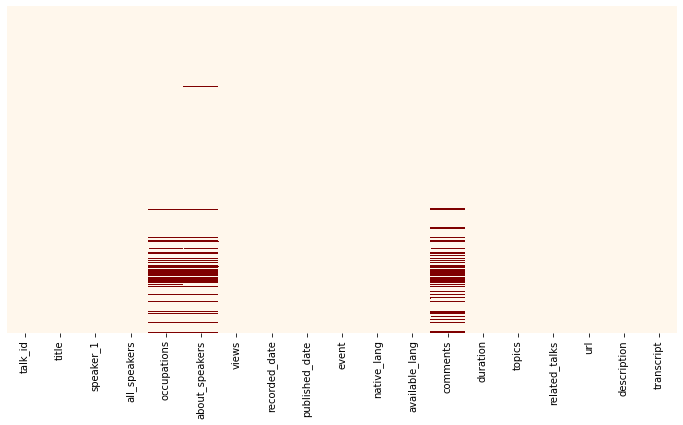

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(tedtalk_df.isnull(),cbar=False,yticklabels=False,cmap='OrRd');

We can see that we have missing values in several columns which needs to be treated after EDA.

Here many columns have the data in the form of a string and dictionaries. To access the data and to build model, we should have cleaned data which can be easily accessed. So we are converting all columns to its proper datatype.

In [24]:

tedtalk_df['occupations'].fillna(str({0:['other']}),inplace=True)
#filling NA with other

tedtalk_df['occupations'] = tedtalk_df.apply(lambda row: eval(row['occupations']), axis=1)
#to convert from str to dict

tedtalk_df['occupations'] = tedtalk_df['occupations'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['about_speakers'].fillna(str({0:'Not specified'}),inplace=True)
#filling the NA's with 'Not specified'

tedtalk_df['about_speakers'] = tedtalk_df.apply(lambda row: eval(row['about_speakers']), axis=1)
#to convert from str to dict

tedtalk_df['about_speakers'] = tedtalk_df['about_speakers'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['recorded_date'].fillna(tedtalk_df['recorded_date'].mode()[0],inplace=True)
#since dates are kind of discrete vaariables, we replace NA with mode.

tedtalk_df['available_lang'] = tedtalk_df['available_lang'].apply(lambda row: eval(row))
tedtalk_df['topics'] = tedtalk_df['topics'].apply(lambda row: eval(row))
tedtalk_df['related_talks'] = tedtalk_df['related_talks'].apply(lambda row: eval(row))
#converting all the remaining columns which were in strings to their respective datatypes.

Here, some of the missing values are treated which missing value % was very less. Its done beacuse it will give better visualizations in our EDA.

In [ ]:
tedtalk_df.drop(['talk_id','all_speakers','url'],axis=1,inplace=True)

These columns are deleted as its not carrying much significance

In [27]:
#Apart from the numeric column we are going to deal with all other missing values as its usefull for the EDA.
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         4005 non-null   int64         
 1   title           4005 non-null   object        
 2   speaker_1       4005 non-null   object        
 3   all_speakers    4001 non-null   object        
 4   occupations     4005 non-null   object        
 5   about_speakers  4005 non-null   object        
 6   views           4005 non-null   int64         
 7   recorded_date   4005 non-null   datetime64[ns]
 8   published_date  4005 non-null   datetime64[ns]
 9   event           4005 non-null   object        
 10  native_lang     4005 non-null   object        
 11  available_lang  4005 non-null   object        
 12  comments        3350 non-null   float64       
 13  duration        4005 non-null   int64         
 14  topics          4005 non-null   object        
 15  rela

In [28]:
#converting the published and recorded date as datetime datatype
import datetime
tedtalk_df['published_date']=pd.to_datetime(tedtalk_df['published_date'], format='%Y-%m-%d')
tedtalk_df['recorded_date']=pd.to_datetime(tedtalk_df['recorded_date'], format='%Y-%m-%d')


In [29]:
#finding out the respected day,month and year
tedtalk_df['release_day'] = tedtalk_df['published_date'].apply(lambda x: x.weekday())
tedtalk_df['release_month']=tedtalk_df['published_date'].apply(lambda x: x.month)
tedtalk_df['release_year'] = tedtalk_df['published_date'].apply(lambda x: x.year)

In [30]:
#tedtalk_day was interms of numbers which were holding the record of monday till sunday...so converting that to exact days here
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_df['release_day']=tedtalk_df['release_day'].map(week_day)
#again converting the month which was in numbers to exact month names
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_df['release_month']=tedtalk_df['release_month'].map(month_dict)

In [31]:
tedtalk_df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,release_day,release_month,release_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},[climate advocate],Nobel Laureate Al Gore focused the world’s att...,3523392,2006-02-25,2006-06-27,TED2006,...,272.0,977,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},[global health expert; data visionary],"In Hans Rosling’s hands, data sings. Global tr...",14501685,2006-02-22,2006-06-27,TED2006,...,628.0,1190,"[Africa, Asia, Google, demo, economics, global...","{2056: 'Own your body's data', 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,June,2006


In [33]:
ted_talk_df = tedtalk_df.copy()
ted_talk_df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,release_day,release_month,release_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},[climate advocate],Nobel Laureate Al Gore focused the world’s att...,3523392,2006-02-25,2006-06-27,TED2006,...,272.0,977,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},[global health expert; data visionary],"In Hans Rosling’s hands, data sings. Global tr...",14501685,2006-02-22,2006-06-27,TED2006,...,628.0,1190,"[Africa, Asia, Google, demo, economics, global...","{2056: 'Own your body's data', 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,June,2006


Data cleaning is done we can proceed to the EDA part

# **EDA**

---


**Speaker_1 column**

Speaker of top 10 most watched video




In [36]:
most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_1','views','title']]
     

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


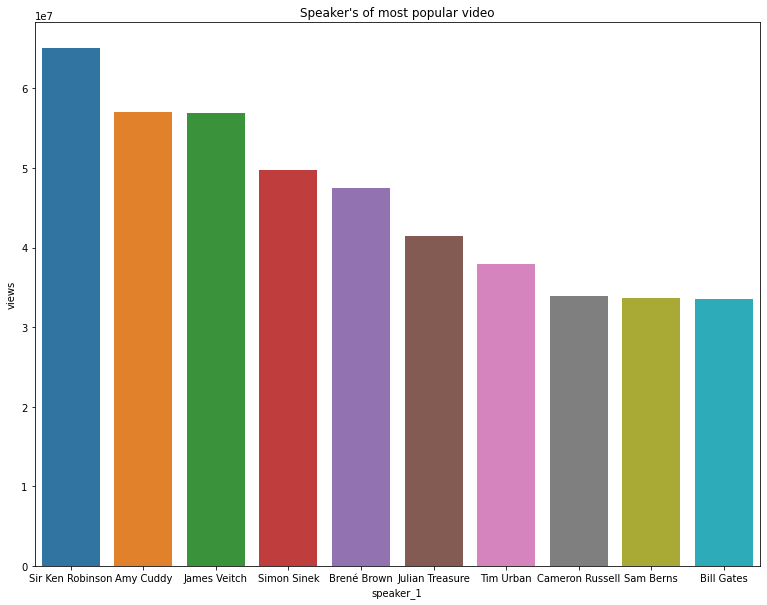

In [42]:
#finding Speaker's of most popular video
plt.figure(figsize=(13,10))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=most_popular_video_df)

Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.

It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.

There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.

Let's find most popular speaker

**Let's find most popular speaker**

In [43]:
#finding most popular speaker from the dataset
most_popular_video_df=tedtalk_df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(15,['views'])
most_popular_video_df.reset_index(inplace=True)
most_popular_video_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


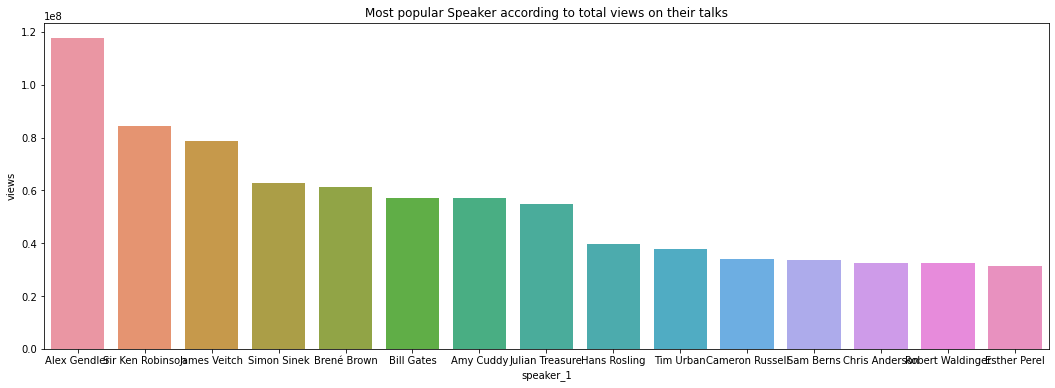

In [46]:

#printing most popular Speaker according to total views on their talks
plt.figure(figsize=(18,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=most_popular_video_df)

Alex Gendler is the most popular speaker followed by Sir Ken Robinson